# Exploring Clustering Results
The file containing the clustering results is stored in the processed data folder with the suffix clean. The index is set to the first __Product group key__.

As a reminder the file is organized in three columns: _Product Group Key_, _Cluster Number_ and the corresponding _Centroid_ of the cluster.

In [3347]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/models/train_model.py

C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4880]:
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1


import os
import sys
# add the 'src' directory as one where we can import modules
root_dir = os.path.join(os.getcwd(),os.pardir,os.pardir)
src_dir = os.path.join(os.getcwd(), os.pardir,os.pardir, 'src')
if src_dir not in sys.path: sys.path.append(src_dir)


from data import preprocessing as prp
%aimport data.preprocessing


import pandas as pd
import math
import numpy as np

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import copy as cp

import seaborn as sns

import statsmodels.api as sm
from scipy.stats import chisquare

from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error as MSE
from sklearn.metrics import precision_recall_fscore_support as report

import helpers as hlp
%aimport helpers
from data import preprocessing as prp
%aimport data.preprocessing

pd.options.display.max_rows = 10

from IPython.display import display

from dotenv import find_dotenv, load_dotenv
#Load env vars
load_dotenv(find_dotenv())

subfolder = os.getenv("SUBFOLDER")
PREFIX = os.getenv("PREFIX")
raw_path = os.path.join(root_dir,"data\\raw\\",subfolder)
interim_path = os.path.join(root_dir,"data\\interim\\",subfolder) 
processed_path = os.path.join(root_dir,"data\\processed\\",subfolder) 

reports_path = os.path.join(root_dir,"reports\\",subfolder)
models_path = os.path.join(root_dir,"models\\",subfolder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6051]:
file_name = "7C_euc_p2_clustering_clean_week_v2.csv"

season = s="Autumn"
clean_df = prp.load_file("product_p2_clean_full_%s"%s, type_= "I").set_index("Product").astype(np.float64)
zclean_df = prp.load_file("product_z_p2_clean_%s"%s, type_= "P").set_index("Product").astype(np.float64)

df_prd_cluster = pd.read_csv(models_path+file_name, sep=';', encoding='utf-8').drop('Unnamed: 0',axis=1).set_index('Product')

print(df_prd_cluster.shape)
df_prd_cluster.head()


(1046, 2)


,Cluster,Centroid
Product,,
3.6E+101_2,3,331026700_2
31C000963_2,15,335030700_2
31C002201_2,13,338980000_2
31C002300_2,4,328956467_2
31C002400_2,5,326901900_2


## Get clients description

## Get Products description
In order to get the product features description, an inner join on the product group key is operated on the cluster result with the products description file.

Since the clustering was calculated on the second level group, some columns of the description file must be dropped in order to avoid duplicates of the first level products (mainly Promo and Standard version of the products)

In [6052]:
file_name = "product_7cerf.txt"

non_unique_features=[]

code_features = []



df_produit = pd.read_csv(raw_path+file_name, sep='\t',encoding="utf8")


                
# df_produit = df_produit.drop(code_features,axis=1)
# df_produit = df_produit.drop_duplicates()
# df_produit = df_produit.dropna(how="all")
# df_produit = df_produit.reset_index(drop=True)
# df_produit = df_produit.apply(lambda x:x.astype(str).str.upper())


df_produit = df_produit.drop_duplicates(["Key_lvl2","Description"])


print(df_produit.shape)
df_produit.head()

(51349, 22)


,Key_lvl1,Description,Key_lvl2,Key_lvl3,Key_lvl4,Key_lvl5,Key_lvl6,Key_lvl7,Continuation of,Base Price 1 Target Value,...,Size,Gender,Year of Commodity,Launch Date,Tag Price,Product Status,Sales Season,Continuation,Age Group,Product ABC Classification
0,20300138600,RQC-老人头棉袜BL0017,203001386_2,男-短袜-长筒袜-8.25元,男-短袜-长筒袜,男-短袜,男,袜子,NaN,8.0,...,JM,No Gender,2011,01/01/1900,8.25,D,Autumn,NO,29-38,NaN
1,20300329000,RQC-国奥棉袜BL4038,203003290_2,男-短袜-长筒袜-4.38元,男-短袜-长筒袜,男-短袜,男,袜子,NaN,4.0,...,JM,No Gender,2011,01/01/1900,4.38,D,Autumn,NO,29-38,NaN
2,20300355500,RQC-爱国者棉袜BL010,203003555_2,男-短袜-长筒袜-4.76元,男-短袜-长筒袜,男-短袜,男,袜子,NaN,5.0,...,JM,No Gender,2011,01/01/1900,4.76,D,Autumn,NO,29-38,NaN
3,20300418700,RQC-老人头棉袜BL0020,203004187_2,男-短袜-长筒袜-8.25元,男-短袜-长筒袜,男-短袜,男,袜子,NaN,8.0,...,JM,No Gender,2011,01/01/1900,8.25,D,Autumn,NO,29-38,NaN
4,20300419000,RQC-老人头棉袜BL0021,203004190_2,男-短袜-长筒袜-7.5元,男-短袜-长筒袜,男-短袜,男,袜子,NaN,8.0,...,JM,No Gender,2011,01/01/1900,7.50,D,Autumn,NO,29-38,NaN


## Table of products and  clusters

In [6053]:
unbalanced = ["Description","Key_lvl7","Product Status"]#,"Sales Season"

#Join with clusters
product_cluster = df_produit.join(df_prd_cluster,on='Key_lvl2',how='inner').reset_index(drop = True).dropna(axis = 1)
product_cluster.drop(unbalanced, axis = 1 , inplace=True)
rw = product_cluster.copy()

prp.display(product_cluster)

#product_cluster.to_csv(interim_path+"product_cluster.csv",sep=";",encoding="utf-8")

(1046, 17)


,Key_lvl1,Key_lvl2,Key_lvl3,Key_lvl4,Key_lvl5,Key_lvl6,Base Price 1 Target Value,Color,Size,Gender,Year of Commodity,Launch Date,Tag Price,Sales Season,Age Group,Cluster,Centroid
0,31C0009635602,31C000963_2,女-内穿一体裤-薄型-29元,女-内穿一体裤-薄型,女-内穿一体裤,女,29.0,Black,Sheer,No Gender,2016,05/10/2016,29.0,Autumn,29-38,15,335030700_2
1,31C0022017000,31C002201_2,女-内穿一体裤-薄型-29元,女-内穿一体裤-薄型,女-内穿一体裤,女,29.0,Gray,No Size,No Gender,2016,08/09/2016,29.0,Autumn,18-28,13,338980000_2
2,31C0023005602,31C002300_2,女-内穿一体裤-薄型-29元,女-内穿一体裤-薄型,女-内穿一体裤,女,29.0,Black,Sheer,No Gender,2016,25/10/2016,29.0,Autumn,29-38,4,328956467_2
3,31C0024005602,31C002400_2,女-内穿一体裤-薄型-39元,女-内穿一体裤-薄型,女-内穿一体裤,女,39.0,Black,Sheer,No Gender,2017,15/09/2017,39.0,Autumn,29-38,5,326901900_2
4,31C0025005602,31C002500_2,女-内穿一体裤-薄型-29元,女-内穿一体裤-薄型,女-内穿一体裤,女,29.0,Black,Sheer,No Gender,2017,11/09/2017,29.0,Autumn,18-28,9,331028600_2


## Translate Features

#### Load chinese features and translate them

#### Create a CH==>EN dictionnary for all the features and save it to a file

#### Load the dictionnary file

### Translate the products dataframe

In [6054]:
product_cluster = prp.translate_df(product_cluster,columns=["Key_lvl3","Key_lvl4","Key_lvl5","Key_lvl6"])
prp.display(product_cluster)   

(1046, 17)


,Key_lvl1,Key_lvl2,Key_lvl3,Key_lvl4,Key_lvl5,Key_lvl6,Base Price 1 Target Value,Color,Size,Gender,Year of Commodity,Launch Date,Tag Price,Sales Season,Age Group,Cluster,Centroid
0,31C0009635602,31C000963_2,Female - One-piece pants inside - Thin - $29,Female - One Internal Pants - Thin,Female - One-piece pants,Female,29.0,Black,Sheer,No Gender,2016,05/10/2016,29.0,Autumn,29-38,15,335030700_2
1,31C0022017000,31C002201_2,Female - One-piece pants inside - Thin - $29,Female - One Internal Pants - Thin,Female - One-piece pants,Female,29.0,Gray,No Size,No Gender,2016,08/09/2016,29.0,Autumn,18-28,13,338980000_2
2,31C0023005602,31C002300_2,Female - One-piece pants inside - Thin - $29,Female - One Internal Pants - Thin,Female - One-piece pants,Female,29.0,Black,Sheer,No Gender,2016,25/10/2016,29.0,Autumn,29-38,4,328956467_2
3,31C0024005602,31C002400_2,Female - One-piece pants inside - Thin - $39,Female - One Internal Pants - Thin,Female - One-piece pants,Female,39.0,Black,Sheer,No Gender,2017,15/09/2017,39.0,Autumn,29-38,5,326901900_2
4,31C0025005602,31C002500_2,Female - One-piece pants inside - Thin - $29,Female - One Internal Pants - Thin,Female - One-piece pants,Female,29.0,Black,Sheer,No Gender,2017,11/09/2017,29.0,Autumn,18-28,9,331028600_2


## Merge Products and Clients tables

Save the final result into a csv file for further exploration

In [6055]:
filename = "p2_clustering_clean_week_2.csv"
product_cluster.to_csv(processed_path+filename,sep=';',encoding='utf-8')

## Exploratory Data Analysis

## Feature Engineering

In [6250]:
dataframe = product_cluster.set_index(["Key_lvl2"])[["Key_lvl3","Color","Size","Launch Date","Age Group","Cluster"]].copy()
dataframe.index.names = ["Product"]
features_to_encode = ["Key_lvl3","Color","Size","Launch Date","Age Group"]

features_list = ["Color","Size","Launch Date","Age Group","Person","Product","Ptype","Price","Cluster"]

df_to_encode = prp.translate_df(product_cluster[features_to_encode].drop_duplicates(),columns=["Key_lvl3"])
df = dataframe.copy()

Error when translating:  ('Female - One-piece pants inside - Thin - $29', 'occurred at index Key_lvl3')


In [6251]:
def extract_features(data_frame):
    season = product_cluster["Sales Season"].min()
    data_frame["Person"] = data_frame["Key_lvl3"].map(lambda x: GetInfo(x,0))
    data_frame["Product"] = data_frame["Key_lvl3"].map(lambda x: GetInfo(x,1))
    data_frame["Ptype"] = data_frame["Key_lvl3"].map(lambda x: GetInfo(x,2))
    data_frame["Price"] = data_frame["Key_lvl3"].map(lambda x: GetInfo(x,3))
    data_frame["Launch Date"] = data_frame["Launch Date"].map(lambda x: date_to_week(x,season)).astype(int)
    data_frame.drop(["Key_lvl3"],axis=1,inplace  = True)
    
    #missing values
    data_frame.Person.fillna("Female")
    data_frame.Product.fillna("One-Piece Pants Inside")
    
def _first_week_of_season(season,year):
    return {
        "Autumn":date(year,9,21).isocalendar()[1],
        "Winter":date(year,12,21).isocalendar()[1],
        "Spring":date(year,3,21).isocalendar()[1],
        "Summer":date(year,6,21).isocalendar()[1]
    }[season]

def date_to_week(d,season):
    try:
        the_date = datetime.strptime(d,"%d/%m/%Y")
        first_week = _first_week_of_season(season,the_date.year)
        if(d=="01/01/1900"): return 1
        week_number = the_date.isocalendar()[1]
        return (week_number - first_week)+1
    except:
        return d
    
def GetInfo(key3,order,sep = " -"):
    try:
        splits = key3.split(sep)
        if len(splits)<4:
            if order == 3: res = _get_price(key3).strip()
            if order == 2: res = "Thin" 
        else:
            if order == 3: res =  _get_price(key3).strip()
            else: res =  splits[order].strip()
        
        return str(res).title()
    except Exception:
        return None


def _get_price(s,i=0):
    regex = r"^[^\d\$]*(\$?\s?\d{1,3}\.?\d{0,2}\D{0,5}$)"
    matches  = re.findall(regex,s)
    price = matches[0].replace(" ","").upper().replace("RMB","YUAN").strip()
    return price
    
# mindate = df_to_encode[df_to_encode["Launch Date"] != "01/01/1900"]["Launch Date"].apply(lambda x: datetime.strptime(x,"%d/%m/%Y")).min()

df_to_encode["Person"] = df_to_encode["Key_lvl3"].map(lambda x: GetInfo(x,0))
df_to_encode["Product"] = df_to_encode["Key_lvl3"].map(lambda x: GetInfo(x,1))
df_to_encode["Ptype"] = df_to_encode["Key_lvl3"].map(lambda x: GetInfo(x,2))
df_to_encode["Price"] = df_to_encode["Key_lvl3"].map(lambda x: GetInfo(x,3))
df_to_encode["Launch Date"] = df_to_encode["Launch Date"].map(lambda x: date_to_week(x,season))

df.pipe(extract_features)
df = df[features_list]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 31C000963_2 to 328956469_2
Data columns (total 9 columns):
Color          1046 non-null object
Size           1046 non-null object
Launch Date    1046 non-null int32
Age Group      1046 non-null object
Person         1037 non-null object
Product        1037 non-null object
Ptype          1046 non-null object
Price          1046 non-null object
Cluster        1046 non-null int64
dtypes: int32(1), int64(1), object(7)
memory usage: 77.6+ KB


## Classification Models

In [6215]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier  
import subprocess
from sklearn.tree import  export_graphviz
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,LabelEncoder


def visualize_tree(tree, feature_names,class_names=None):
    
    with open(reports_path+"dt.dot", 'w') as f:
        
        export_graphviz(tree, out_file=f, feature_names=feature_names,  filled=True, rounded=True, class_names=True )

    command = ["C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe", "-Tpng", reports_path+"dt.dot", "-o", "dt.png"]
    
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

        
drop =["Key_lvl1","Key_lvl2","Centroid","Gender"]#,"Key_lvl3","Key_lvl4","Key_lvl5","Key_lvl6,"Size"
keep = ["Key_lvl3","Key_lvl4","Key_lvl5","Key_lvl6","Cluster"]
                
        
       
    
features_list = ["Color","Size","Launch Date","Age Group","Person","Product","Ptype","Price","Cluster"]

features_df = df[features_list].copy()
    
    
data = product_cluster.drop(drop,axis=1).fillna("NA").dropna(axis=1)
# data = data[keep]
data = features_df.copy()


display(data.head())

cat_data = []
i=0
for label,col in data.iteritems():
    cat_data.append(col.astype('category'))
# df = pd.DataFrame(np.array(cat_data).T,columns = data.columns)


S = pd.get_dummies(data.drop(["Cluster"],axis=1).iloc[:,:].astype(str))
print(S.shape)

# features = X.columns
# y = lb.fit_transform(data.values[:,-1].astype(int).T)

,Color,Size,Launch Date,Age Group,Person,Product,Ptype,Price,Cluster
Product,,,,,,,,,
31C000963_2,Black,Sheer,3,29-38,Female,One-Piece Pants Inside,Thin,$29,15
31C002201_2,Gray,No Size,-1,18-28,Female,One-Piece Pants Inside,Thin,$29,13
31C002300_2,Black,Sheer,6,29-38,Female,One-Piece Pants Inside,Thin,$29,4
31C002400_2,Black,Sheer,0,29-38,Female,One-Piece Pants Inside,Thin,$39,5
31C002500_2,Black,Sheer,0,18-28,Female,One-Piece Pants Inside,Thin,$29,9


(1046, 183)


In [6232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 31C000963_2 to 328956469_2
Data columns (total 9 columns):
Color          1046 non-null object
Size           1046 non-null object
Launch Date    1046 non-null int32
Age Group      1046 non-null object
Person         1037 non-null object
Product        1037 non-null object
Ptype          1046 non-null object
Price          1046 non-null object
Cluster        1046 non-null int64
dtypes: int32(1), int64(1), object(7)
memory usage: 77.6+ KB


In [6238]:
def encode_data(data):
    le = LabelEncoder()
    x_data  = data.drop(["Cluster"],axis=1).iloc[:,:].astype(str)
    y_data = data.values[:,-1].astype(int)


    from sklearn.feature_extraction import DictVectorizer

    X_dict = x_data.T.to_dict().values()

    vect = DictVectorizer(sparse=False)
    X_vector = vect.fit_transform(X_dict)

    y = lb.fit_transform(y_data.T)
    y = y_data.T
    X = X_vector
    encoded = np.zeros((x_data.shape))
    for j,col in enumerate(x_data.values.T):
        encoded[:,j] = le.fit_transform(col)
    return X, y    
    
X,y = encode_data(data)

X  = pd.get_dummies(data.drop(["Cluster"],axis=1).iloc[:,:])
y = data["Cluster"]
print(X.shape)

(1046, 145)


In [6239]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier



# classifier = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=4)  
# classifier = SVC(C=0.1, class_weight='balanced')
classifier = RandomForestClassifier(n_estimators=200)
# classifier = KNeighborsClassifier(n_neighbors=1,weights='uniform', algorithm='brute');
# classifier = MLPClassifier(hidden_layer_sizes=(16,8),solver='lbfgs',max_iter=2000,verbose = True)#8,5
# classifier = GaussianNB()


# classifier = DummyClassifier()

## Standard evaluation metrics of the algorithm

In [6247]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
yt_pred = classifier.predict(X_train)

# print(confusion_matrix(y_test, y_pred) 
# precision,recall,fscore,support = report(y_test, y_pred,warn_for=(),labels=np.unique(y_pred))
print("Train")
print(classification_report(y_train,yt_pred,labels=np.unique(y_test) )[-54:])
print("Test")
print(classification_report(y_test,y_pred,labels=np.unique(y_test) )[-54:])

Train

avg / total       0.75      0.73      0.73       836

Test

avg / total       0.31      0.28      0.29       210



In [6248]:
argsorted = np.fliplr(np.argsort(y_pred_proba, axis=1))
nguess = argsorted[:,0:4]+1
# np.argmax(y_pred,axis=1)+1

## RMSE to the center of the predicted cluster 

#### Joining the series with the predicted clusters of the test set

In [6068]:
series_df = clean_df.copy()
predictions = nguess
n_pred = predictions.shape[1]
pred_df = pd.DataFrame(predictions,columns=["PC%d"%g for g in np.arange(n_pred)+1 ],index=X_test.index)
cluster_centroid = df_prd_cluster[["Cluster","Centroid"]].drop_duplicates().set_index(["Cluster"]).to_dict()["Centroid"]

for i in np.arange(n_pred)+1:
    pred_df["PR%d"%i] = pred_df["PC%d"%i].apply(lambda x: cluster_centroid[x])
    
product_centroid = X_test.join(df_prd_cluster)[["Cluster","Centroid"]]
full_series = pred_df.join(product_centroid.join(series_df.astype(np.float64), how="inner"),how="inner")

full_series

,PC1,PC2,PC3,PC4,PR1,PR2,PR3,PR4,Cluster,Centroid,...,10,11,12,13,14,15,16,17,18,19
Product,,,,,,,,,,,,,,,,,,,,,
31C999903_2,15,5,9,2,335030700_2,326901900_2,331028600_2,335043401_2,15,335030700_2,...,124.222222,60.888889,34.444444,21.333333,14.222222,11.333333,12.222222,17.777778,22.666667,38.222222
31C999913_2,1,15,5,7,331995271_2,335030700_2,326901900_2,335057700_2,2,335043401_2,...,1794.888889,2622.888889,3307.333333,3827.777778,3508.000000,2916.888889,2122.222222,1635.333333,1317.333333,1054.666667
31C999914_2,19,7,5,2,345018600_2,335057700_2,326901900_2,335043401_2,12,331052900_2,...,607.333333,714.888889,765.555556,807.111111,837.111111,850.222222,879.111111,970.444444,1114.222222,1155.555556
325026100_2,2,15,11,13,335043401_2,335030700_2,335026000_2,338980000_2,15,335030700_2,...,1.111111,0.666667,0.666667,0.888889,1.111111,1.555556,1.555556,1.333333,0.666667,0.222222
325026900_2,2,15,11,13,335043401_2,335030700_2,335026000_2,338980000_2,4,328956467_2,...,4.000000,3.333333,2.222222,1.555556,2.222222,3.111111,4.222222,3.333333,2.444444,1.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36D291706_2,1,10,19,13,331995271_2,331052300_2,345018600_2,338980000_2,1,331995271_2,...,510.000000,589.555556,695.555556,828.888889,848.666667,824.000000,761.777778,701.777778,683.555556,666.444444
36D291710_2,19,1,10,12,345018600_2,331995271_2,331052300_2,331052900_2,19,345018600_2,...,1038.666667,1412.666667,1764.222222,1817.777778,1620.222222,1408.666667,1215.777778,1184.222222,1083.555556,1068.000000
39D997832_2,9,1,14,2,331028600_2,331995271_2,335322901_2,335043401_2,3,331026700_2,...,98.888889,72.666667,43.777778,28.000000,22.222222,20.888889,13.555556,10.000000,8.000000,9.555556


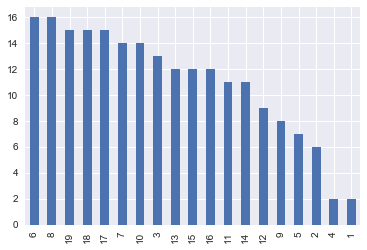

In [6045]:
full_series.PC4.value_counts().plot(kind="bar")

In [ ]:
p_series = full_series.copy()
N = p_series.shape[0]
notin = p_series[ (p_series.Cluster!=p_series.PC1) & (p_series.Cluster!=p_series.PC2) &(p_series.Cluster!=p_series.PC3)  &(p_series.Cluster!=p_series.PC4)].shape[0]

print("%.2f Not in Top 4 guesses"%(notin/N*100))



offset = (n_pred * 2) + 2
guess = 2

s_true = np.zeros((series_df.shape))
s_pred = np.zeros((series_df.shape))
RMSE = []
PRMSE = []
CORR = []
SP=[]
i = 0
for index,values in p_series.iterrows():
    centroid = values["PR%d"%guess]
    cluster = values["Centroid"]
    
    #Getting the series raw, centroid of actual cluster, centroid of predicted cluster
    series = (values[offset:]/values[offset:].std()).astype(np.float64)
    c_series = (series_df.loc[cluster]/series_df.loc[cluster].std()).astype(np.float64)
    predicted_series = (series_df.loc[centroid]/series_df.loc[centroid].std()).astype(np.float64)
    
    s_true[i] = series
    s_pred[i] = c_series
    
    n = len(series)
    rmse = math.sqrt(MSE(series,c_series)/n)
    prmse = math.sqrt(MSE(series,predicted_series)/n)
    corr = np.corrcoef(series,predicted_series)[0][1]
    sp = pdist([series,predicted_series], lambda u, v: spearmanr_dist(u,v))
    
    RMSE.append(rmse)
    PRMSE.append(prmse)
    CORR.append(corr)
    i+=1
    
  
sales = p_series.values[:,offset:].astype(np.float64)
p_series["PRMSE"] = PRMSE
p_series["RMSE"] = RMSE
p_series["CORR"] = CORR
results = pd.DataFrame(index = p_series.index)

results["Mean"] = sales.mean(axis=1)
results["Std"]  = sales.std(axis=1)
results["Range"] = sales.max(axis=1) - sales.min(axis=1)
results["RMSE"] = RMSE
results["PRMSE"] = PRMSE
results["CORR"] = CORR


print("%.2f have less than 70%% correlation between predicted and actual series"%(results[results.CORR<0.7].shape[0]/N*100))


results[results.PRMSE != results.RMSE].nlargest(210,"PRMSE").head(10)

In [ ]:
bad = p_series[p_series.PRMSE != p_series.RMSE]#.nlargest(12,"PRMSE")
good = p_series[p_series.CORR>0.8]


disp = bad.iloc[:,:-3].loc[["325001400_2"]]
display(disp.head())


plt.figure(figsize=(18,8))
i=1;
for index,values in disp.iterrows():
    guess1 = values["PR1"]
    guess2 = values["PR2"]
    guess3 = values["PR3"]
    guess4 = values["PR4"]
    cluster = values["Centroid"]
    
    series = values[offset:]/values[offset:].std()
    c_series = series_df.loc[cluster]/series_df.loc[cluster].std()
    predicted_series = series_df.loc[guess1]/series_df.loc[guess1].std()
    
    p2 = series_df.loc[guess2]/series_df.loc[guess2].std()
    p3 = series_df.loc[guess3]/series_df.loc[guess3].std()
    p4 = series_df.loc[guess4]/series_df.loc[guess4].std()
    
    plt.subplot(4,3,i)
    plt.plot(series,label="Series",c='m')
    plt.plot(predicted_series,label="P1",ls='--')
    plt.plot(p2,label="P2",ls='--')
    plt.plot(p3,label="P3",ls='--')
    #plt.plot(p4,label="P4",ls='--')
    
    plt.legend(loc=0)
    
    i+=1
    

plt.tight_layout()
plt.show()


In [ ]:
test_df = prp.load_file("test",type_="P").set_index('Product')
test_series = test_df.values



unbalanced = ["Description","Key_lvl7","Product Status"]#,"Sales Season"
#Join with clusters
test_product = df_produit.join(test_df,on='Key_lvl2',how='inner').reset_index(drop = True).dropna(axis = 1)
test_product.drop(unbalanced, axis = 1 , inplace=True)



X_test = prp.translate_df(test_product_cluster,columns=["Key_lvl3","Key_lvl4","Key_lvl5","Key_lvl6"])


tdf = X_test[["Color","Size","Launch Date","Age Group"]].copy()

tdf["Person"] = X_test["Key_lvl3"].map(lambda x: GetInfo(x,0))
tdf["Product"] = X_test["Key_lvl3"].map(lambda x: GetInfo(x,1))
tdf["Ptype"] = X_test["Key_lvl3"].map(lambda x: GetInfo(x,2))
tdf["Price"] = X_test["Key_lvl3"].map(lambda x: GetInfo(x,3))
tdf["Cluster"] = 0.
X_test = tdf.copy()

display(X_test)

X,y = encode_data(X_test)

y_pred = classifier.predict(X)


test_series.shape

TypeError: only integer arrays with one element can be converted to an index

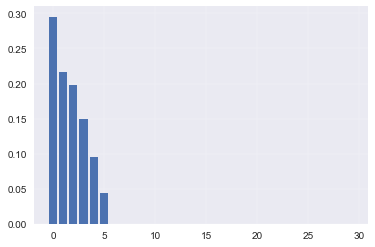

In [6139]:
fi = classifier.feature_importances_
sorted_indices = np.argsort(fi)[::-1]

imp = sorted_indices[:30]

plt.bar(range(len(imp)),fi[imp])
plt.xticks(range(len(imp)), features[imp],rotation = 90)
plt.show()

In [6138]:
from graphviz import Graph,Source
from IPython.display import SVG

graph = Source(export_graphviz(classifier, out_file=None
   , feature_names=features, class_names=True
   , filled = True))

display(SVG(graph.pipe(format='svg')))


IndexError: list index out of range

# Homogeneity Test
In order to detect specific caraterstics for each resulted cluster we perform a statistic test based on Pearsons chi-square score with the hypothesis of a uniform distribution.

Features with the pvalues lower than 0.1 are displayed for analysis

In [2805]:
def cramer_v(chisq,n,k,r=1):
    return math.sqrt(chisq/(n * min(k-1,r-1) ))

### Calculate modalities frequency through clusters
As a first step, all the distrubtions of modalities across features and clusters are calculated and stored in one array structered as follows:

One array for each cluster which contains a dictionnary of features. Each feature is again a dictionary of modalities and their occurence in that cluster

In [6095]:
#get the features
all_features = df.columns[:-1]


features = all_features

#get the clusters (actually its a range(1,nb_cluster))
clusters = set(product_cluster['Cluster'].values)

#array to store each cluster and freq for all the features
clusters_feature_dist = [0] #to shift the indices to clusters

#loop trhough features

for c in clusters:
    feature_dist = dict()
    for feature in features:
        freq = df[df['Cluster']==c].groupby(feature)[feature].count()
        feature_dist[feature]=freq.to_dict()
    clusters_feature_dist.append(feature_dist)



### Chi-square test over clusters

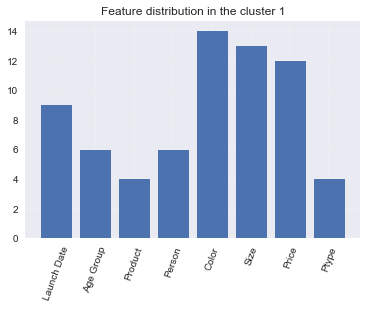

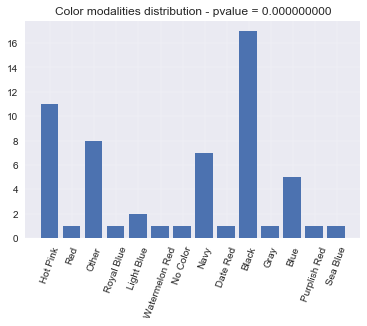

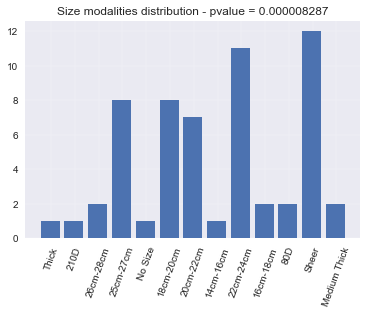

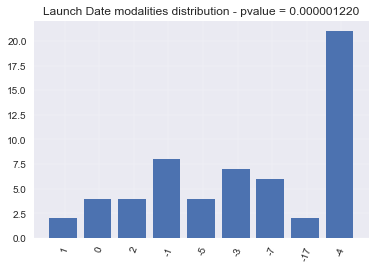

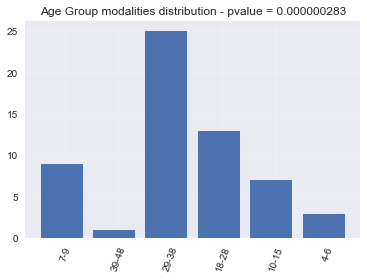

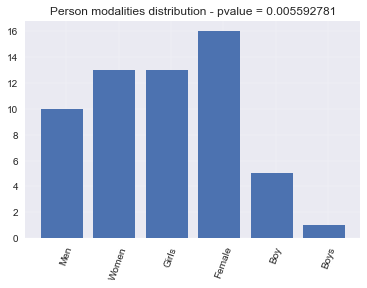

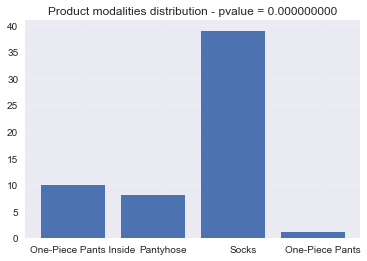

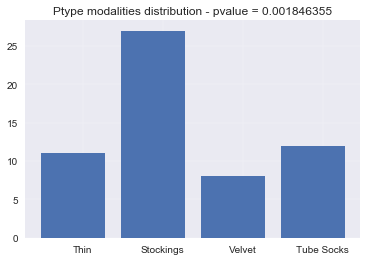

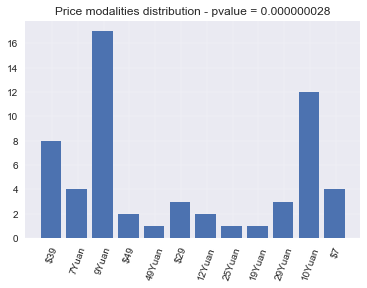

In [6129]:

pthreashold = 0.2

#get the features
features = all_features

clusters = [1]


res_features_over_cluster = [0]
for c in clusters:
    #align each feature with its distrubtion in this cluster c
    cluster_feature_dist = clusters_feature_dist[c]
    dist = [len(x) for x in list(cluster_feature_dist.values())]
    keys = list(cluster_feature_dist.keys())    

    #plot the dist of number of elements by feature in this clust
    plt.title("Feature distribution in the cluster %d"%c)
    plt.bar(range(len(keys)),dist)
    plt.xticks(range(len(keys)),keys,rotation=70)
    
    #for each feature display its distribution over modalities
    for feature in features:
        #get information from the previous array
        cluster_feature_dist = clusters_feature_dist[c]
        feature_distribution = list(cluster_feature_dist[feature].values())
        feature_keys = list(cluster_feature_dist[feature].keys())
        nftrs = len(feature_keys)
        chisq, p = chisquare(feature_distribution)
        if p<pthreashold:
            plt.figure()
            plt.title("%s modalities distribution - pvalue = %.9f"%(feature,p))
            plt.bar(np.arange(nftrs),feature_distribution)
            plt.xticks(np.arange(nftrs)+(0.5/nftrs),feature_keys,rotation=70 if nftrs>4 else 0)
    plt.show(block = True)
    


### Calculate modalities frequency through features

In [6097]:
#get the features
features = all_features

#get the clusters (actually its a range(1,nb_cluster))
clusters = set(df['Cluster'].values)

#dict to store each feater and freq for all the clusters
features_clust_dist = dict()

#invert the dict and get it by feature 
for f in features:
    freq = dict()
    for c in clusters: 
        freq[c] =  clusters_feature_dist[c][f]
    features_clust_dist[f] = freq

### Chi-square test over features

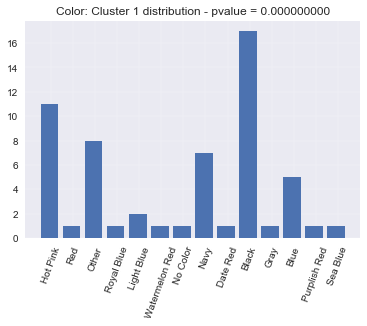

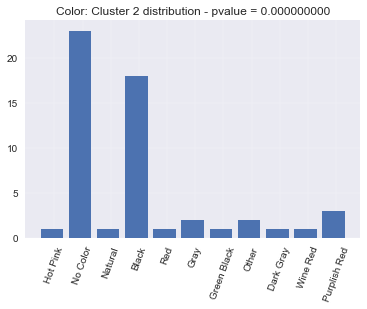

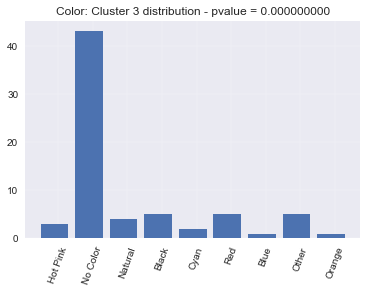

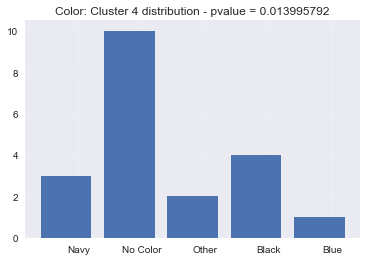

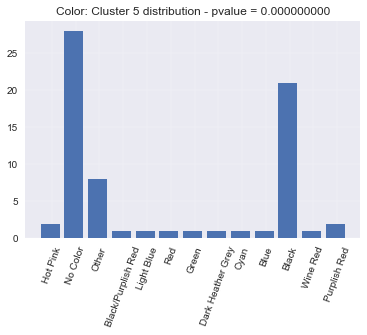

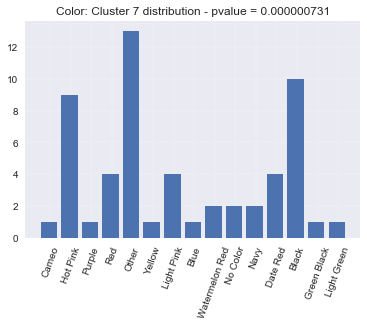

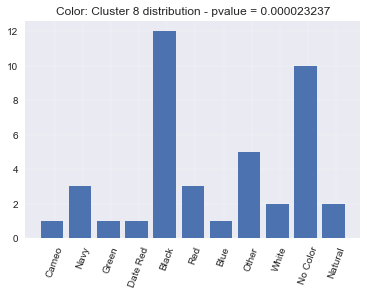

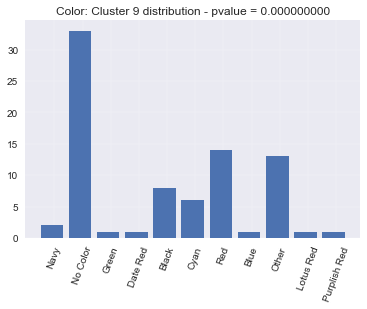

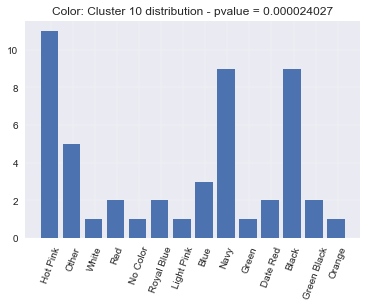

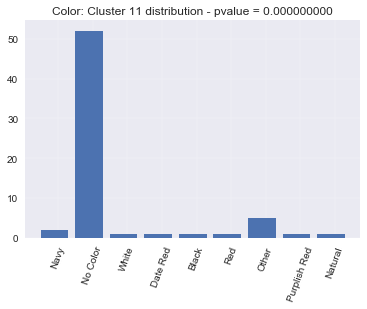

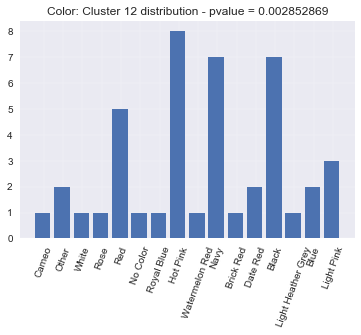

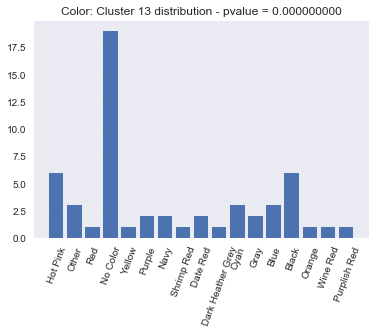

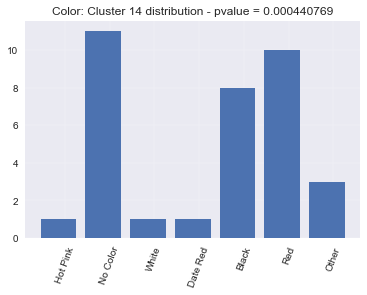

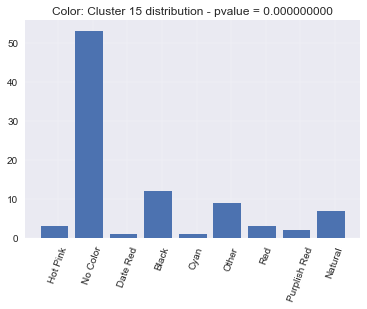

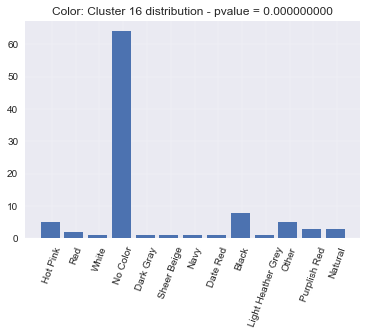

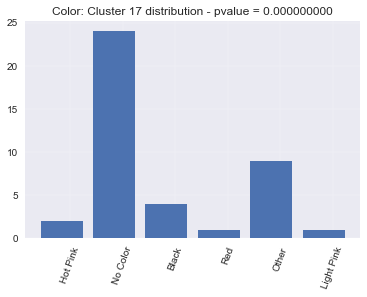

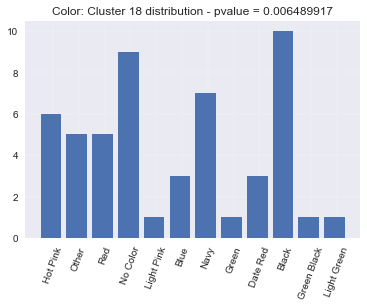

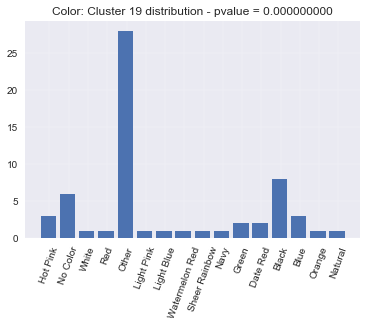

In [6130]:
pthreashold = 0.2
clusters = set(product_cluster['Cluster'].values)

features = all_features
features = ["Color"]

for f in features:
    for c in clusters:
        #get information from the previous array
        feature_clust_dist = features_clust_dist[f]
        feature_distribution = list(feature_clust_dist[c].values())
        feature_keys = list(feature_clust_dist[c].keys())
        nftrs = len(feature_keys)
        chisq, p = chisquare(feature_distribution)
        if p<pthreashold:
            plt.figure()
            plt.title("%s: Cluster %d distribution - pvalue = %.9f"%(f,c,p))
            plt.bar(np.arange(nftrs),feature_distribution)
            plt.xticks(np.arange(nftrs)+(1.0/nftrs),feature_keys,rotation=70 if nftrs>5 else 0)
            
    plt.show(block = True)     



### Modalities distribution

In [6101]:
clusters = set(product_cluster['Cluster'].values)
nclusters = len(clusters)
#get the features
features = all_features


modalities_clust_dist = dict()

for f in features:
    feature_sum=[]
    modalities = set(df[f].values)
    modalities_distribution=dict()
    for m in modalities:
        modality_distribution = np.zeros((nclusters+1))
        for c in clusters:
            #get information from the previous array
            feature_clust_dist = features_clust_dist[f]
            modality_distribution[c] +=(feature_clust_dist[c][m] if m in feature_clust_dist[c] else 0)
        modalities_distribution[m] = modality_distribution    
    modalities_clust_dist[f] = modalities_distribution 

### Chi-square test for modalities over clusters

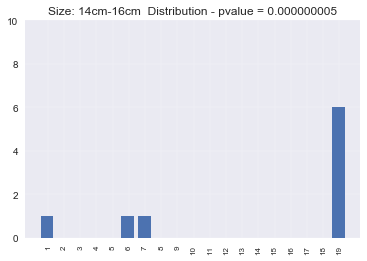

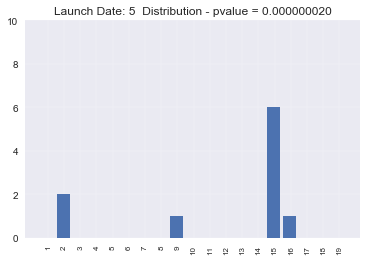

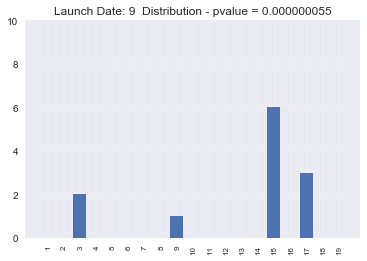

C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\scipy\stats\stats.py:4544: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


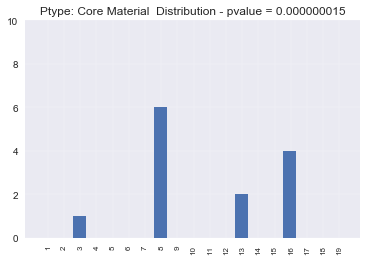

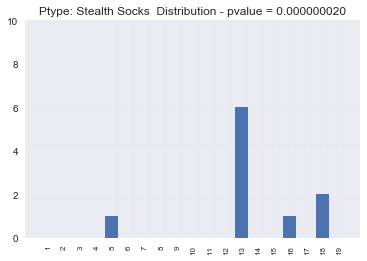

In [6127]:
%matplotlib inline

clusters = set(product_cluster['Cluster'].values)
nclusters = len(clusters)


pthreashold = 0.2

n_min_dist = 4
min_members = 5


min_dust  = True
for f in features:
    modalities = set(df[f].values)
    r = len(modalities)
    for m in modalities:
        modality_dist = modalities_clust_dist[f][m]
        md = np.count_nonzero(modality_dist)<=n_min_dist and np.max(modality_dist)>min_members
        chisq, p = chisquare(modality_dist)
        if p<pthreashold and (md and min_dust):
            plt.figure()
            plt.title("%s: %s  Distribution - pvalue = %.9f"%(f,m,p))
            plt.bar(np.arange(nclusters)+1,modality_dist[1:])
            plt.xticks(np.arange(nclusters)+(1.0/nclusters)+1,np.arange(nclusters)+1,rotation=90,size=8)
            if np.max(modality_dist[1:])<10: plt.ylim(0,10)
    plt.show(block = True)  

## MCA Analysis

### Remove unbalanced columns

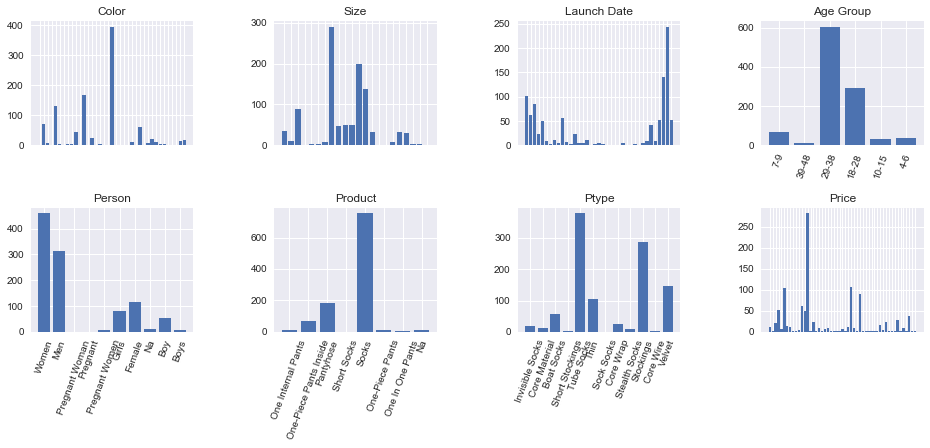

In [6077]:
features_df = df.fillna("Na").drop("Cluster",axis=1).copy()

# features_df.info()
plt.figure(figsize=(16,16))
features = features_df.columns
for i,f in enumerate(features):
    counts = features_df.groupby([f])[f].count().to_dict()
    dist = list(counts.values())
    keys = list(counts.keys())
    chisq, p = chisquare(dist)
    plt.subplot(5,4,i+1)
    plt.title("%s"%(f))
    plt.bar(range(len(keys)),dist)
    plt.xticks(range(len(keys)),keys,rotation=70)
    if len(keys)>20: plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.subplots_adjust(wspace=0.5, hspace=0.5)      
plt.show()

### Apply MCA on Products

In [ ]:
import prince

mca = prince.MCA(features_df)
mca.plot_relationship_square()
plt.show()

### Apply MCA on Clients

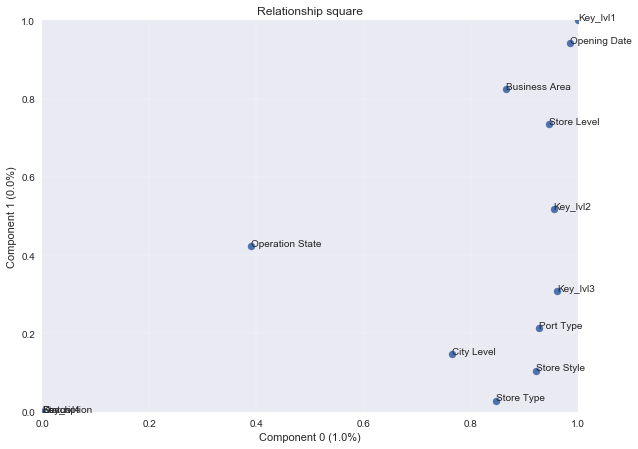

In [144]:
import prince
features_df = client_df.astype(str).fillna("NA")
mca = prince.MCA(features_df)
mca.plot_relationship_square()
plt.show()

In [ ]:
from sklearn.grid_search import GridSearchCV
print("Fitting the classifier to the training set")
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'linear']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [5377]:
p=np.random.randint(0,2,size=2)
print(p)

[1 1]
